# TB Stores by states

![title](../img/tb_by_state.png)

# TB Stores by city (in Azizona)

![title](../img/tb_by_city.png)

In [37]:
import pandas as pd
import requests
import re
import time
from bs4 import BeautifulSoup as bs
from pprint import pprint
from IPython.display import HTML, display

In [38]:
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_colwidth', 200)


# Visit main page to get store list with urls

In [39]:
url = 'https://locations.tacobell.com/index.html'
response = requests.get(url)

response.status_code

200

In [40]:
page = response.text

soup = bs(page)

In [41]:
url_prefix = 'https://locations.tacobell.com/'

In [42]:
re_number = re.compile(r'(\d+)')

states_total = [int(re_number.search(p['data-count']).group(1)) for p in soup.find_all('a', class_ = 'Directory-listLink')]
states_name = [p.text for p in soup.find_all('a', class_ = 'Directory-listLink')]
state_urls = [url_prefix + p['href'] for p in soup.find_all('a', class_ = 'Directory-listLink')]


In [43]:
df_tb_stores_by_state = pd.DataFrame({'state' :  states_name,
             'total_stores' : states_total,
             'url': state_urls})

In [44]:
df_tb_stores_by_state

,state,total_stores,url
0,Alabama,130,https://locations.tacobell.com/al.html
1,Alaska,15,https://locations.tacobell.com/ak.html
2,Arizona,183,https://locations.tacobell.com/az.html
3,Arkansas,106,https://locations.tacobell.com/ar.html
4,California,837,https://locations.tacobell.com/ca.html
5,Colorado,151,https://locations.tacobell.com/co.html
6,Connecticut,48,https://locations.tacobell.com/ct.html
7,Delaware,15,https://locations.tacobell.com/de.html
8,Florida,445,https://locations.tacobell.com/fl.html
9,Georgia,244,https://locations.tacobell.com/ga.html


In [45]:
df_tb_stores_by_state.sort_values('total_stores', ascending = False, inplace = True)
df_tb_stores_by_state.reset_index(drop = True, inplace = True)

In [46]:
df_tb_stores_by_state.head(5)

,state,total_stores,url
0,California,837,https://locations.tacobell.com/ca.html
1,Texas,662,https://locations.tacobell.com/tx.html
2,Florida,445,https://locations.tacobell.com/fl.html
3,Ohio,377,https://locations.tacobell.com/oh.html
4,Michigan,297,https://locations.tacobell.com/mi.html


In [47]:
df_tb_stores_by_state.tail(5)

,state,total_stores,url
46,Delaware,15,https://locations.tacobell.com/de.html
47,Wyoming,14,https://locations.tacobell.com/wy.html
48,North Dakota,11,https://locations.tacobell.com/nd.html
49,Vermont,5,https://locations.tacobell.com/vt.html
50,Washington DC,1,https://locations.tacobell.com/dc/washington/50-massachusetts-ave-ne.html


In [48]:
print(f'Total number of TB stores in US: {df_tb_stores_by_state.total_stores.sum()}')

Total number of TB stores in US: 7270


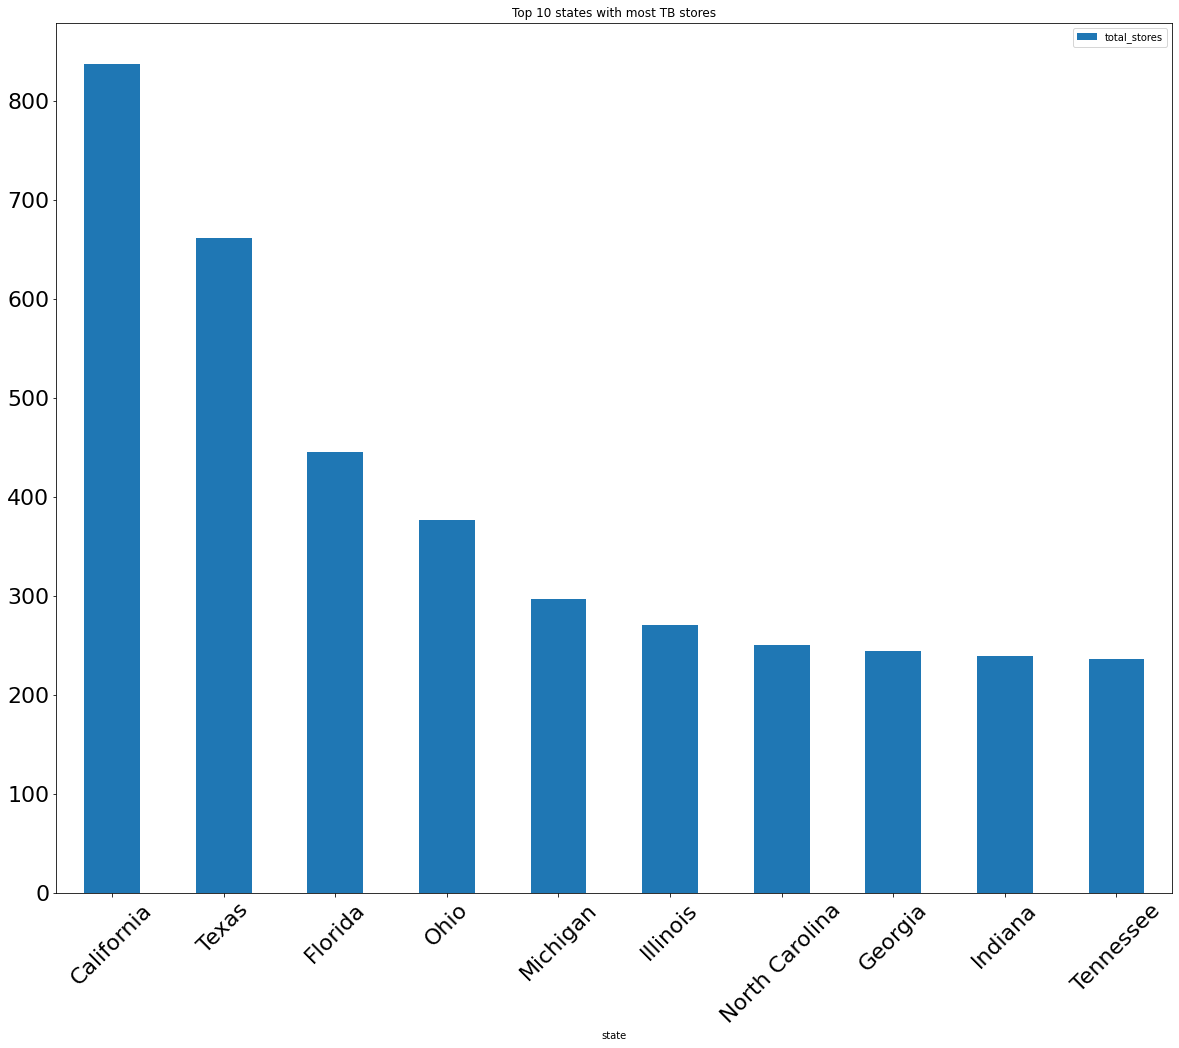

In [49]:
_ = df_tb_stores_by_state.iloc[:10, :].plot.bar(x = 'state', y = 'total_stores',
                              figsize = (20, 16),
                              fontsize = 22,
                              title = 'Top 10 states with most TB stores',
                              rot = 45)

# California (800+), Texas (600+), and Florida (400+) are top 3 states with most TB stores. Together they have about 30% of TB stores in US (7200+)

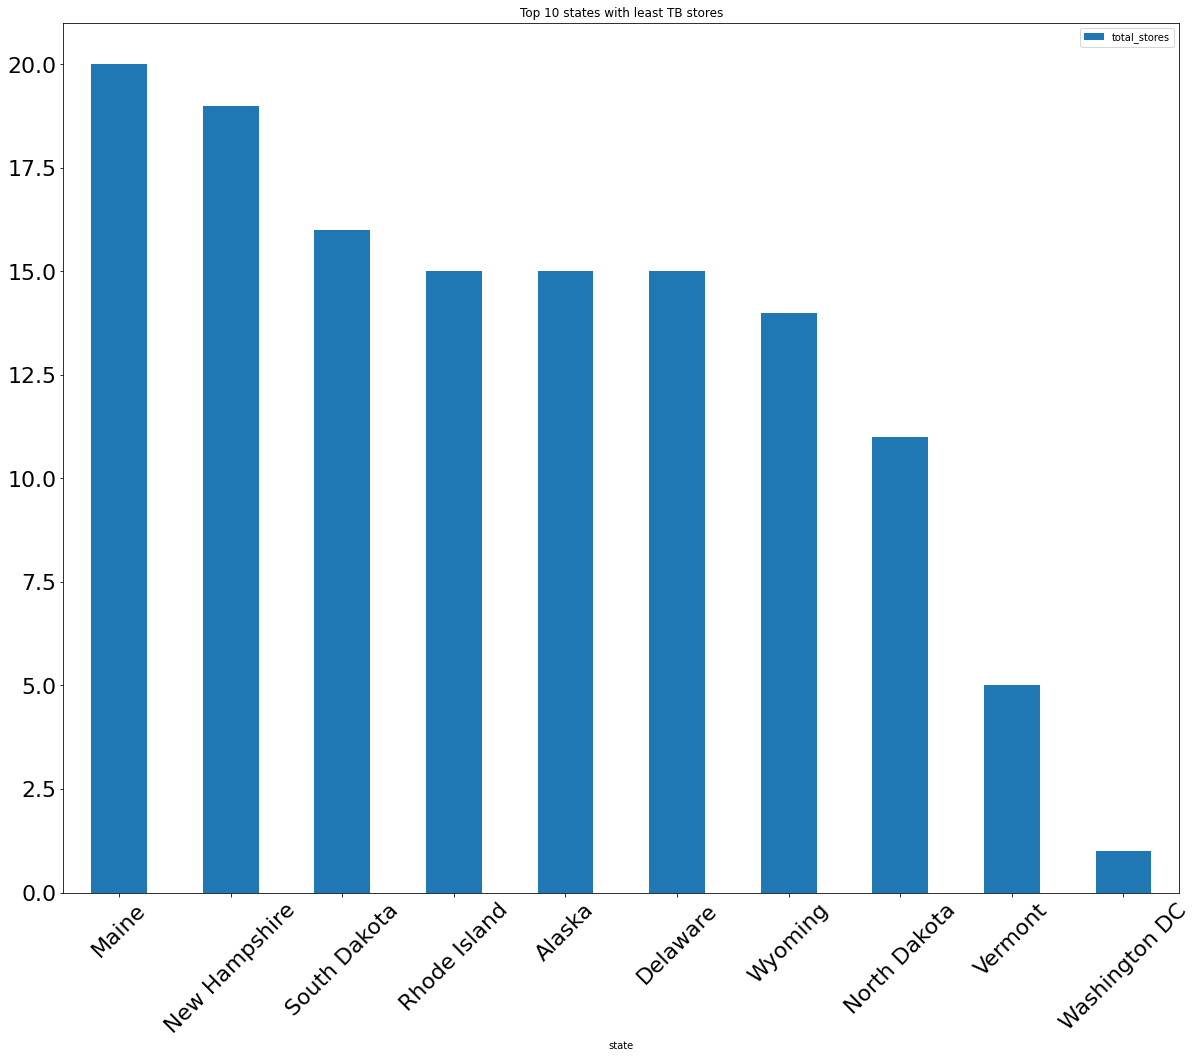

In [50]:
_ = df_tb_stores_by_state.iloc[-10:, :].plot.bar(x = 'state', y = 'total_stores',
                              figsize = (20, 16),
                              fontsize = 22,
                              title = 'Top 10 states with least TB stores',
                              rot = 45)

# Now let's dig in to see store counts in each city

In [51]:
def get_page_info(url):
    response = requests.get(url)
    page = response.text
    soup = bs(page)
    
    return soup

In [52]:
state_city_dflist = []

for state, total, url in list(zip(states_name, states_total, state_urls))[:]:
    if total > 1:
        soup = get_page_info(url)
        city_list = [(p.text, int(re_number.search(p.parent['data-count']).group(1)))
                     for p in soup.find_all('span', class_ = 'Directory-listLinkText')]
        #city_count = [int(re_number.search(p.parent['data-count']).group(1)) for p in soup.find_all('span', class_ = 'Directory-listLinkText')]
        
        citydf = pd.DataFrame(city_list, columns = ['city', 'total_stores'])
        citydf['state'] = state

    else:
        citydf = pd.DataFrame([(state, 1, state)], columns = ['city', 'total_stores', 'state'])

    state_city_dflist.append(citydf)        

state_city_df = pd.concat(state_city_dflist)

In [53]:
state_city_df

,city,total_stores,state
0,Alabaster,1,Alabama
1,Albertville,1,Alabama
2,Alexander City,1,Alabama
3,Andalusia,1,Alabama
4,Anniston,1,Alabama
...,...,...,...
7,Laramie,1,Wyoming
8,Rawlins,1,Wyoming
9,Riverton,1,Wyoming
10,Rock Springs,1,Wyoming


In [54]:
state_city_df.sort_values('total_stores', ascending = False, inplace = True)
state_city_df.reset_index(drop = True, inplace = True)

## Which city has most TB stores?

<AxesSubplot:title={'center':'TB store count by city'}, xlabel='city'>

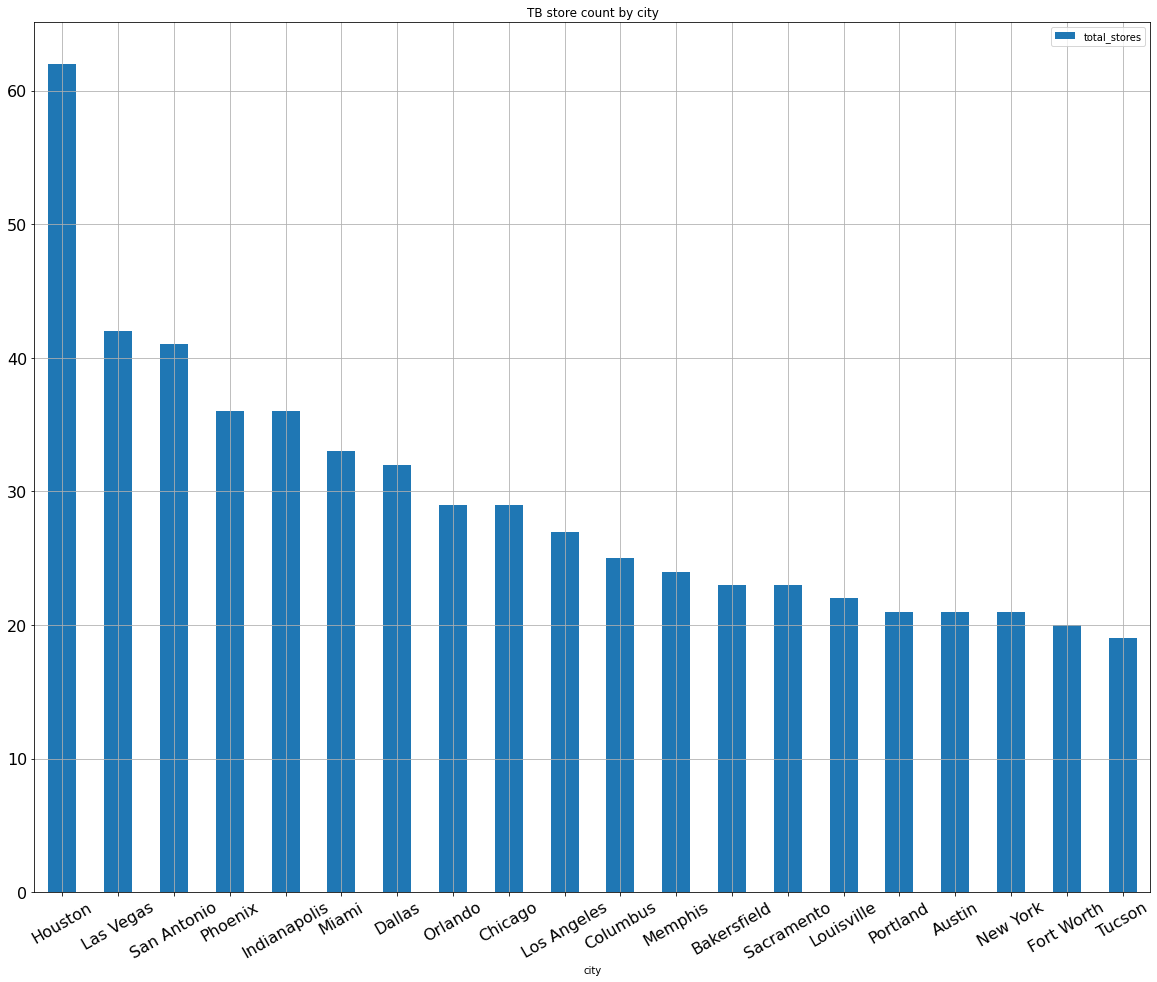

In [55]:
state_city_df.head(20).plot.bar(x = 'city', y = 'total_stores',
                               figsize = (20, 16),
                               rot = 30,
                               grid = True, 
                               fontsize = 16,
                               title = 'TB store count by city')

In [56]:
print(f'Total number of cities in the US that has TB stores = {state_city_df.shape[0]}')

Total number of cities in the US that has TB stores = 4152


## Duplicate cities names in different states

In [57]:
dup_city_name = state_city_df[state_city_df.duplicated('city', keep = False)].sort_values(['city', 'state'])
dup_city_name

,city,total_stores,state
4062,Abbeville,1,Louisiana
2054,Abbeville,1,South Carolina
3965,Aberdeen,1,Maryland
3592,Aberdeen,1,New Jersey
1538,Aberdeen,1,North Carolina
...,...,...,...
2331,York,1,South Carolina
3853,Yorkville,1,Illinois
1539,Yorkville,1,New York
4110,Youngsville,1,Louisiana


In [58]:
print(f'{dup_city_name["city"].nunique()} city names exist in more than one states')

470 city names exist in more than one states


In [59]:
dup_city_name.loc[dup_city_name.city.isin(dup_city_name.sort_values('total_stores').tail(5).city.unique())].sort_values(['city', 'total_stores'])

,city,total_stores,state
3528,Columbus,1,Nebraska
1306,Columbus,1,North Carolina
755,Columbus,2,Indiana
861,Columbus,2,Mississippi
109,Columbus,6,Georgia
10,Columbus,25,Ohio
2142,Dallas,1,Oregon
2178,Dallas,1,Pennsylvania
783,Dallas,2,Georgia
6,Dallas,32,Texas


Interesting, six states have a city named `Columnbus`, four states have a city named `Dallas`